In [1]:
import QuasinormalMode
from QuasinormalMode import *
import Waveforms
from Waveforms import *
import Fit
from Fit import *
import utils
from utils import *
import plot
from plot import *
import ModeSelection
from ModeSelection import *
import postprocess
from postprocess import *
import GRChombo_load
from GRChombo_load import *
from importlib import reload
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft

In [2]:
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], marker='o', color='w', label='without 2.2.1',
                          markerfacecolor='C0', markersize=7),
                   Line2D([0], [0], marker='o', color='w', label='with 2.2.1',
                          markerfacecolor='C1', markersize=7)]

legend_elements_line = [Line2D([0], [0], label='2.2.0',
                          color='C0'),
                       Line2D([0], [0], label='2.2.1',
                              color='C1')]

In [3]:
plt.rc('text', usetex=True)

# When is the QNM model consistent?

In [4]:
h_original, Mf, af, Level, retro = get_waveform_SXS("0305", 2, 2)

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json


In [12]:
t0_arr = np.linspace(0, 50, num = 501)
qnm_fixed_list = long_str_to_qnms("2.2.0_2.2.1", Mf, af)
fitter = QNMFitVaryingStartingTime(h_original,
                t0_arr,
                0,
                qnm_fixed_list = qnm_fixed_list,
                run_string_prefix=f"overtone_test_0305",
                load_pickle = True)

In [13]:
fitter.do_fits()

reloaded fit overtone_test_0305_N_0_fix_2.2.0_2.2.1_t0_0.0000_50.0000_501 from an old run.


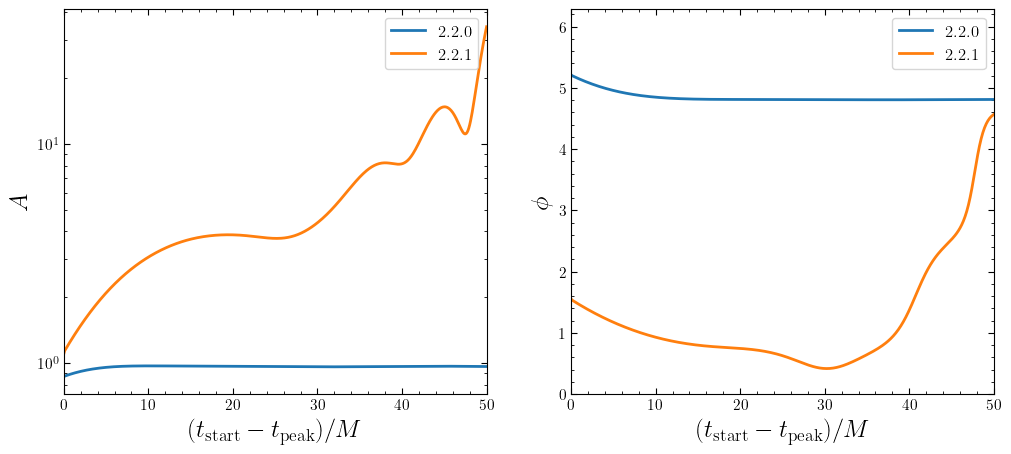

In [14]:
fig, axs = plt.subplots(1, 2, figsize = (12,5))
plot_amplitudes(fitter.result_full, fixed_modes = qnm_fixed_list, ax = axs[0])
plot_phases(fitter.result_full, fixed_modes = qnm_fixed_list, ax = axs[1])
axs[0].set_xlabel(r"$(t_{\rm start} - t_{\rm peak}) / M$")
axs[1].set_xlabel(r"$(t_{\rm start} - t_{\rm peak}) / M$")
plt.savefig("./plots/amplitude_consistency_0305.pdf", bbox_inches = "tight")

# Fitting the merger can give false positive results

In [15]:
import random
random.seed(123)

In [16]:
A_list = [fitter.result_full.A_fix_dict["A_2.2.0"][-1]]
phi_list = [fitter.result_full.phi_fix_dict["phi_2.2.0"][-1]]
qnm_list = long_str_to_qnms("2.2.0", Mf, af)

In [17]:
t_arr = np.linspace(-5, 100, num = 1500)

In [18]:
h_EOB_list = []
for i in range(30):
    c1 = random.uniform(0.9,1.15)
    c3 = random.uniform(0.05,0.06)
    d1 = -random.uniform(3.5, 4.5)
    d2 = random.uniform(0.3,1)
    d3 = random.uniform(0.1,0.2)
    h_EOB = get_waveform_toy_EOB_model(A_list, phi_list, qnm_list, t_arr, 0, [c1, c3], [d1, d2, d3])
    h_EOB_list.append(h_EOB)
h_toy_clean = get_waveform_toy_clean(A_list, phi_list, qnm_list, t_arr)

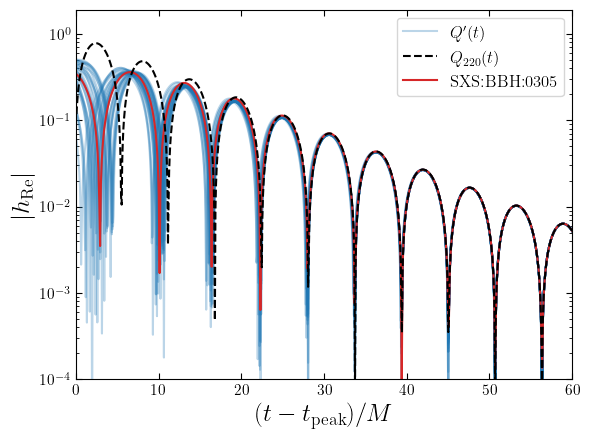

In [19]:
fig, ax = plt.subplots()
label = "$Q^\prime(t)$"
for h_EOB in h_EOB_list:
    ax.semilogy(h_EOB.time, np.abs(h_EOB.hr), c = "C0", alpha = 0.3, label = label)
    label = None
ax.semilogy(h_toy_clean.time, np.abs(h_toy_clean.hr), c = "k", ls = "--", label = "$Q_{220}(t)$", zorder = 100)
ax.semilogy(h_original.time, np.abs(h_original.hr), c = "C3", label = "SXS:BBH:0305")
ax.legend()
ax.set_xlabel(r"$(t - t_{\rm peak}) / M$")
ax.set_ylabel(r"$| h_{\rm Re} |$")
ax.set_xlim(0, 60)
ax.set_ylim(1e-4, None)
plt.savefig("./plots/EOB_toy_waveform.pdf", bbox_inches = "tight")

In [205]:
t0_arr = np.linspace(0,50,num = 501)
toy_fitters_EOB = []
for i, h in enumerate(h_EOB_list):
    fitter_overtone = QNMFitVaryingStartingTime(h,
                t0_arr,
                1,
                qnm_fixed_list = long_str_to_qnms("2.2.0", Mf, af),
                run_string_prefix=f"EOB{i}",
                load_pickle = True)
    toy_fitters_EOB.append(fitter_overtone)

In [206]:
for toy_fitter in toy_fitters_EOB:
    toy_fitter.do_fits()

reloaded fit EOB0_N_1_fix_2.2.0_t0_0.0000_50.0000_501 from an old run.
reloaded fit EOB1_N_1_fix_2.2.0_t0_0.0000_50.0000_501 from an old run.
reloaded fit EOB2_N_1_fix_2.2.0_t0_0.0000_50.0000_501 from an old run.
reloaded fit EOB3_N_1_fix_2.2.0_t0_0.0000_50.0000_501 from an old run.
reloaded fit EOB4_N_1_fix_2.2.0_t0_0.0000_50.0000_501 from an old run.
reloaded fit EOB5_N_1_fix_2.2.0_t0_0.0000_50.0000_501 from an old run.
reloaded fit EOB6_N_1_fix_2.2.0_t0_0.0000_50.0000_501 from an old run.
reloaded fit EOB7_N_1_fix_2.2.0_t0_0.0000_50.0000_501 from an old run.
reloaded fit EOB8_N_1_fix_2.2.0_t0_0.0000_50.0000_501 from an old run.
reloaded fit EOB9_N_1_fix_2.2.0_t0_0.0000_50.0000_501 from an old run.
reloaded fit EOB10_N_1_fix_2.2.0_t0_0.0000_50.0000_501 from an old run.
reloaded fit EOB11_N_1_fix_2.2.0_t0_0.0000_50.0000_501 from an old run.
reloaded fit EOB12_N_1_fix_2.2.0_t0_0.0000_50.0000_501 from an old run.
reloaded fit EOB13_N_1_fix_2.2.0_t0_0.0000_50.0000_501 from an old run.
re

In [35]:
qnm221 = long_str_to_qnms("2.2.1", Mf, af)[0]
qnm221r = qnm221.omegar
qnm221i = qnm221.omegai

In [33]:
from matplotlib.patches import Rectangle

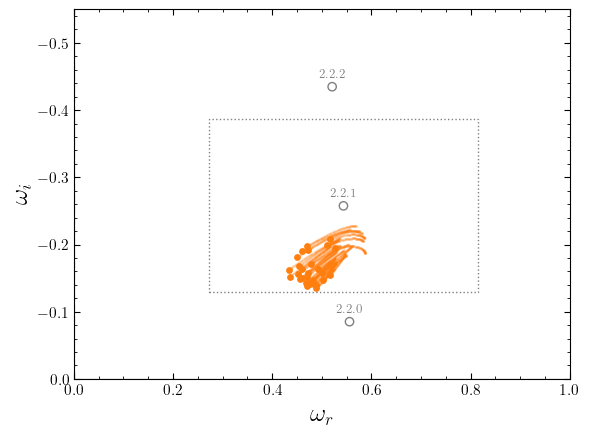

In [261]:
fig, ax = plt.subplots()
ax.set_xlim(0,1)
ax.set_ylim(0, -0.55)
plot_predicted_qnms(
        ax,
        long_str_to_qnms("2.2.0_2.2.1_2.2.2", Mf, af),
        cut_at_0 = True)
for toy_fitter in toy_fitters_EOB:
    plot_omega_free(
        toy_fitter.result_full,
        ax=ax, t0_max=10,
        indicate_start = True, color = "C1",
        line_alpha = 0.1, scatter_alpha = 0.1)
ax.add_patch(Rectangle((qnm221r/2, qnm221i/2), qnm221r, qnm221i, ec = 'gray', fc = 'none', ls = ":"))
plt.savefig("./plots/EOB_toy_221_free.pdf", bbox_inches = "tight")

In [306]:
t0_arr = np.linspace(0,50,num = 501)
toy_fitters_EOB_fix = []
for i, h in enumerate(h_EOB_list):
    fitter_overtone = QNMFitVaryingStartingTime(h,
                t0_arr,
                0,
                qnm_fixed_list = long_str_to_qnms("2.2.0_2.2.1", Mf, af),
                run_string_prefix=f"EOB{i}",
                load_pickle = False)
    toy_fitters_EOB_fix.append(fitter_overtone)

In [307]:
for toy_fitter in toy_fitters_EOB_fix:
    toy_fitter.do_fits()

501it [00:03, 149.87it/s]
501it [00:03, 149.85it/s]
501it [00:03, 148.57it/s]
501it [00:03, 150.12it/s]
501it [00:03, 145.84it/s]
501it [00:03, 145.00it/s]
501it [00:04, 124.34it/s]
501it [00:03, 135.28it/s]
501it [00:03, 135.02it/s]
501it [00:03, 137.54it/s]
501it [00:03, 138.79it/s]
501it [00:03, 135.58it/s]
501it [00:03, 139.99it/s]
501it [00:03, 151.99it/s]
501it [00:03, 147.90it/s]
501it [00:03, 127.62it/s]
501it [00:03, 142.74it/s]
501it [00:03, 146.40it/s]
501it [00:03, 146.36it/s]
501it [00:03, 133.85it/s]
501it [00:03, 139.82it/s]
501it [00:03, 143.99it/s]
501it [00:03, 147.33it/s]
501it [00:03, 149.49it/s]
501it [00:03, 142.10it/s]
501it [00:03, 127.19it/s]
501it [00:03, 142.17it/s]
501it [00:03, 136.96it/s]
501it [00:03, 144.38it/s]
501it [00:03, 146.82it/s]


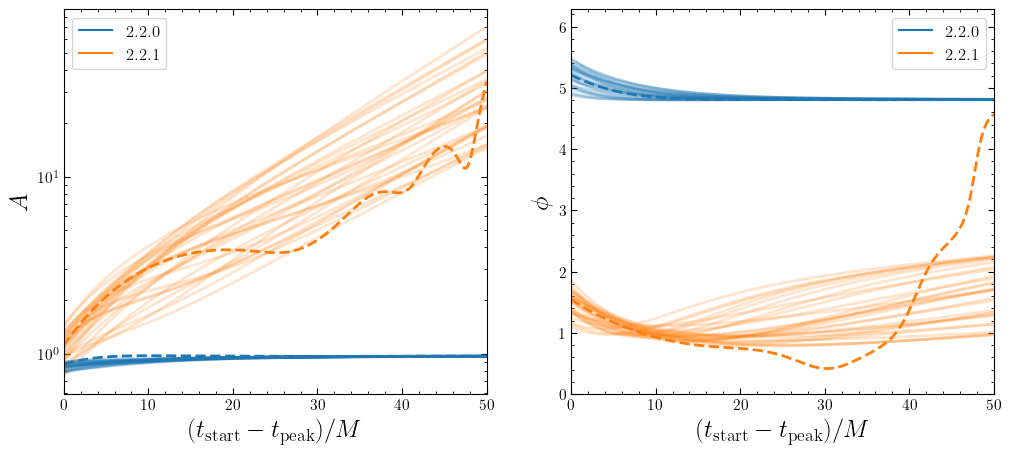

In [404]:
fig, axs = plt.subplots(1, 2, figsize = (12,5))
use_label = True
for toy_fitter in toy_fitters_EOB_fix:
    plot_amplitudes(toy_fitter.result_full, fixed_modes = long_str_to_qnms("2.2.0_2.2.1", Mf, af), ax = axs[0],
                   use_label = use_label, alpha = 0.2)
    plot_phases(toy_fitter.result_full, fixed_modes = long_str_to_qnms("2.2.0_2.2.1", Mf, af), ax = axs[1],
               use_label = use_label, alpha = 0.2)
    use_label = False
plot_amplitudes(fitter.result_full, fixed_modes = qnm_fixed_list, ax = axs[0], ls = '--', use_label = False)
plot_phases(fitter.result_full, fixed_modes = qnm_fixed_list, ax = axs[1], ls = '--', use_label = False)
axs[0].set_xlabel(r"$(t_{\rm start} - t_{\rm peak}) / M$")
axs[1].set_xlabel(r"$(t_{\rm start} - t_{\rm peak}) / M$")
axs[0].legend(handles = legend_elements_line)
axs[1].legend(handles = legend_elements_line)
plt.savefig("./plots/amplitude_phase_EOB.pdf", bbox_inches = "tight")

In [28]:
h_no_exp_list = []
for i in range(30):
    c1 = -random.uniform(73,77)
    c3 = random.uniform(-6,-5)
    d1 = -random.uniform(20, 21)
    d2 = random.uniform(0.2,0.3)
    d3 = random.uniform(0.1,0.2)
    h_no_exp = get_waveform_toy_no_exp(A_list, phi_list, qnm_list, t_arr, -5, [c1, c3], [d1, d2, d3])
    h_no_exp_list.append(h_no_exp)
h_toy_clean = get_waveform_toy_clean(A_list, phi_list, qnm_list, t_arr)

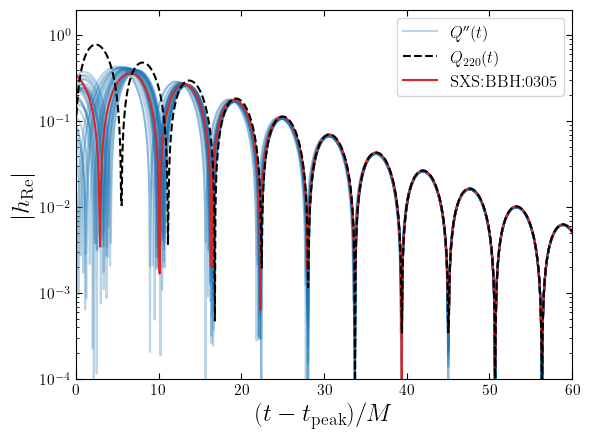

In [29]:
fig, ax = plt.subplots()
label = "$Q^{\prime \prime}(t)$"
for h_no_exp in h_no_exp_list:
    ax.semilogy(h_no_exp.time, np.abs(h_no_exp.hr), c = "C0", alpha = 0.3, label = label)
    label = None
ax.semilogy(h_toy_clean.time, np.abs(h_toy_clean.hr), c = "k", ls = "--", label = "$Q_{220}(t)$", zorder = 100)
ax.semilogy(h_original.time, np.abs(h_original.hr), c = "C3", label = "SXS:BBH:0305")
ax.legend()
ax.set_xlabel(r"$(t - t_{\rm peak}) / M$")
ax.set_ylabel(r"$| h_{\rm Re} |$")
ax.set_xlim(0, 60)
ax.set_ylim(1e-4, None)
plt.savefig("./plots/no_exp_toy_waveform.pdf", bbox_inches = "tight")

In [30]:
t0_arr = np.linspace(0,50,num = 501)
toy_fitters_no_exp = []
for i, h in enumerate(h_no_exp_list):
    fitter_overtone = QNMFitVaryingStartingTime(h,
                t0_arr,
                1,
                qnm_fixed_list = long_str_to_qnms("2.2.0", Mf, af),
                run_string_prefix=f"noexp{i}",
                load_pickle = False)
    toy_fitters_no_exp.append(fitter_overtone)

In [31]:
for toy_fitter in toy_fitters_no_exp:
    toy_fitter.do_fits()

501it [01:57,  4.26it/s]
501it [00:04, 110.32it/s]
501it [00:04, 100.79it/s]
501it [00:04, 113.06it/s]
501it [00:04, 113.35it/s]
501it [00:05, 98.96it/s] 
501it [00:04, 107.45it/s]
501it [00:04, 114.71it/s]
501it [00:04, 111.77it/s]
501it [00:04, 112.00it/s]
501it [00:04, 108.10it/s]
501it [00:05, 94.57it/s] 
501it [00:04, 110.24it/s]
501it [00:04, 116.12it/s]
501it [00:04, 108.83it/s]
501it [00:04, 108.69it/s]
501it [00:04, 103.57it/s]
501it [00:04, 110.88it/s]
501it [00:04, 109.06it/s]
501it [00:04, 118.24it/s]
501it [00:04, 113.09it/s]
501it [00:04, 111.28it/s]
501it [00:04, 116.35it/s]
501it [00:04, 111.64it/s]
501it [00:05, 98.61it/s] 
501it [00:04, 104.66it/s]
501it [00:04, 113.49it/s]
501it [00:04, 108.32it/s]
501it [00:04, 110.23it/s]
501it [00:04, 100.25it/s]


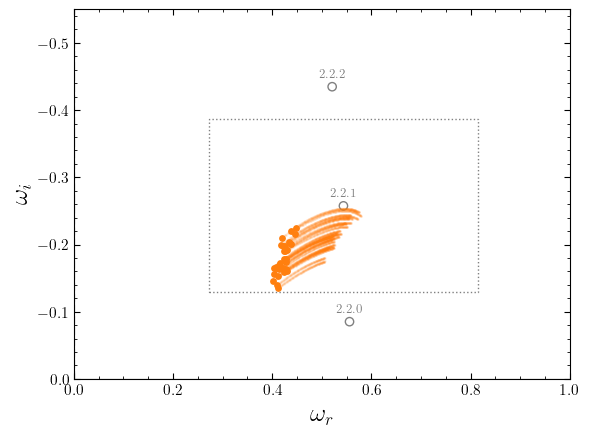

In [36]:
fig, ax = plt.subplots()
ax.set_xlim(0,1)
ax.set_ylim(0,-0.55)
plot_predicted_qnms(
        ax,
        long_str_to_qnms("2.2.0_2.2.1_2.2.2", Mf, af),
        cut_at_0 = True)
for toy_fitter in toy_fitters_no_exp:
    plot_omega_free(
        toy_fitter.result_full,
        ax=ax, t0_max=10,
        indicate_start=True, color = "C1",
        line_alpha = 0.1, scatter_alpha = 0.1)
ax.add_patch(Rectangle((qnm221r/2, qnm221i/2), qnm221r, qnm221i, ec = 'gray', fc = 'none', ls = ":"))
plt.savefig("./plots/no_exp_toy_221.pdf", bbox_inches = "tight")

In [37]:
t0_arr = np.linspace(0,50,num = 501)
toy_fitters_no_exp_fix = []
for i, h in enumerate(h_no_exp_list):
    fitter_overtone = QNMFitVaryingStartingTime(h,
                t0_arr,
                0,
                qnm_fixed_list = long_str_to_qnms("2.2.0_2.2.1", Mf, af),
                run_string_prefix=f"noexp{i}",
                load_pickle = False)
    toy_fitters_no_exp_fix.append(fitter_overtone)

In [38]:
for toy_fitter in toy_fitters_no_exp_fix:
    toy_fitter.do_fits()

501it [00:03, 130.79it/s]
501it [00:04, 103.03it/s]
501it [00:04, 114.85it/s]
501it [00:04, 120.49it/s]
501it [00:04, 114.54it/s]
501it [00:04, 101.17it/s]
501it [00:04, 124.75it/s]
501it [00:03, 137.76it/s]
501it [00:03, 142.45it/s]
501it [00:03, 134.61it/s]
501it [00:03, 138.43it/s]
501it [00:03, 139.36it/s]
501it [00:03, 138.01it/s]
501it [00:03, 139.87it/s]
501it [00:03, 140.72it/s]
501it [00:03, 143.26it/s]
501it [00:03, 141.03it/s]
501it [00:03, 142.14it/s]
501it [00:03, 138.66it/s]
501it [00:03, 144.59it/s]
501it [00:03, 141.96it/s]
501it [00:03, 137.88it/s]
501it [00:03, 140.79it/s]
501it [00:03, 136.67it/s]
501it [00:03, 137.05it/s]
501it [00:03, 138.01it/s]
501it [00:03, 134.56it/s]
501it [00:03, 135.56it/s]
501it [00:03, 134.64it/s]
501it [00:03, 137.37it/s]


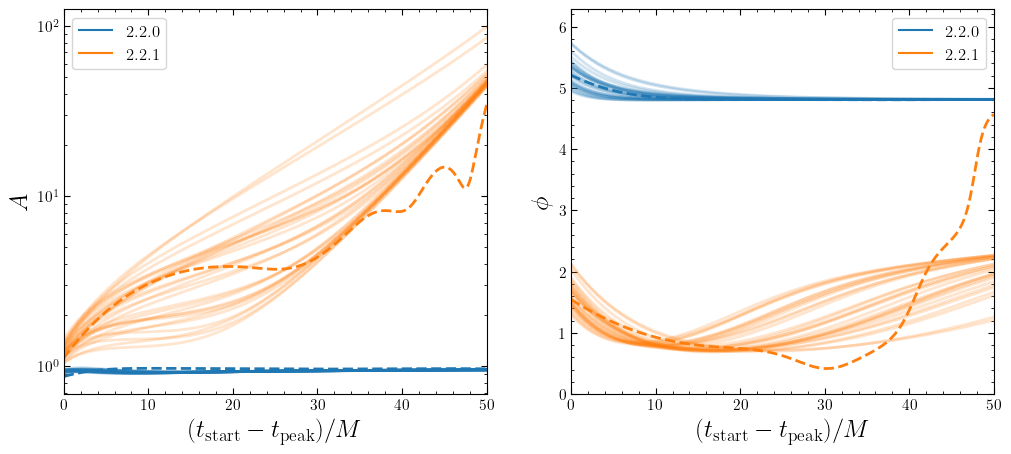

In [39]:
fig, axs = plt.subplots(1, 2, figsize = (12,5))
use_label = True
for toy_fitter in toy_fitters_no_exp_fix:
    plot_amplitudes(toy_fitter.result_full, fixed_modes = long_str_to_qnms("2.2.0_2.2.1", Mf, af), ax = axs[0],
                   use_label = use_label, alpha = 0.2)
    plot_phases(toy_fitter.result_full, fixed_modes = long_str_to_qnms("2.2.0_2.2.1", Mf, af), ax = axs[1],
               use_label = use_label, alpha = 0.2)
    use_label = False
plot_amplitudes(fitter.result_full, fixed_modes = qnm_fixed_list, ax = axs[0], ls = '--', use_label = False)
plot_phases(fitter.result_full, fixed_modes = qnm_fixed_list, ax = axs[1], ls = '--', use_label = False)
axs[0].set_xlabel(r"$(t_{\rm start} - t_{\rm peak}) / M$")
axs[1].set_xlabel(r"$(t_{\rm start} - t_{\rm peak}) / M$")
axs[0].legend(handles = legend_elements_line)
axs[1].legend(handles = legend_elements_line)
plt.savefig("./plots/amplitude_phase_no_exp.pdf", bbox_inches = "tight")

# The overtone removes the junk at the peak

In [118]:
t0_arr = np.linspace(0,10,num = 101)
qnm_free_list = long_str_to_qnms_free("2.2.0")
toy_fitters_EOB_varMa_0 = []
for i, h in enumerate(h_EOB_list):
    fitter = QNMFitVaryingStartingTime(h,
                t0_arr,
                qnm_fixed_list = [],
                qnm_free_list=qnm_free_list,
                var_M_a = True,
                run_string_prefix=f"EOB{i}",
                load_pickle = False)
    toy_fitters_EOB_varMa_0.append(fitter)

In [132]:
qnm_free_list = long_str_to_qnms_free("2.2.0_2.2.1")
toy_fitters_EOB_varMa_1 = []
for i, h in enumerate(h_EOB_list):
    fitter = QNMFitVaryingStartingTime(h,
                t0_arr,
                qnm_fixed_list = [],
                qnm_free_list=qnm_free_list,
                var_M_a = True,
                run_string_prefix=f"EOB{i}",
                load_pickle = False)
    toy_fitters_EOB_varMa_1.append(fitter)

In [119]:
for toy_fitter in toy_fitters_EOB_varMa_0:
    toy_fitter.do_fits()

101it [00:11,  8.53it/s]
101it [00:16,  6.06it/s]
101it [00:13,  7.40it/s]
101it [00:11,  8.85it/s]
101it [00:11,  8.58it/s]
101it [00:11,  8.60it/s]
101it [00:11,  8.66it/s]
101it [00:11,  8.79it/s]
101it [00:12,  8.26it/s]
101it [00:11,  9.12it/s]
101it [00:13,  7.70it/s]
101it [00:12,  7.91it/s]
101it [00:12,  8.24it/s]
101it [00:11,  8.71it/s]
101it [00:11,  8.51it/s]
101it [00:12,  8.13it/s]
101it [00:13,  7.76it/s]
101it [00:11,  8.75it/s]
101it [00:12,  8.03it/s]
101it [00:11,  8.57it/s]
101it [00:12,  8.18it/s]
101it [00:13,  7.40it/s]
101it [00:14,  6.86it/s]
101it [00:15,  6.64it/s]
101it [00:15,  6.47it/s]
101it [00:15,  6.60it/s]
101it [00:13,  7.60it/s]
101it [00:14,  6.93it/s]
101it [00:13,  7.25it/s]
101it [00:15,  6.50it/s]


In [135]:
for toy_fitter in toy_fitters_EOB_varMa_1:
    toy_fitter.do_fits()

101it [00:33,  2.97it/s]
101it [00:25,  4.02it/s]
101it [00:23,  4.24it/s]
101it [00:24,  4.12it/s]
101it [00:21,  4.72it/s]
101it [00:28,  3.55it/s]
101it [00:20,  4.99it/s]
101it [00:23,  4.38it/s]
101it [00:25,  3.94it/s]
101it [00:21,  4.77it/s]
101it [00:23,  4.36it/s]
101it [00:22,  4.40it/s]
101it [00:26,  3.81it/s]
101it [00:21,  4.66it/s]
101it [00:26,  3.88it/s]
101it [00:22,  4.40it/s]
101it [00:24,  4.15it/s]
101it [00:24,  4.13it/s]
101it [00:24,  4.16it/s]
101it [00:27,  3.74it/s]
101it [00:20,  4.89it/s]
101it [00:23,  4.24it/s]
101it [00:21,  4.69it/s]
101it [00:26,  3.85it/s]
101it [00:25,  3.97it/s]
101it [00:23,  4.26it/s]
101it [00:22,  4.44it/s]
101it [00:24,  4.05it/s]
101it [00:21,  4.73it/s]
101it [00:27,  3.63it/s]


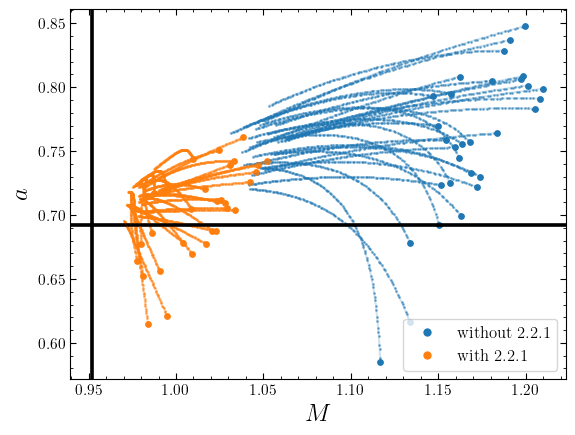

In [297]:
fig, ax = plt.subplots()
for toy_fitter in toy_fitters_EOB_varMa_0:
    plot_M_a(toy_fitter.result_full, Mf = Mf, af = af, ax = ax, color = "C0", indicate_start = True)
for toy_fitter in toy_fitters_EOB_varMa_1:
    plot_M_a(toy_fitter.result_full, Mf = Mf, af = af, ax = ax, color = "C1", indicate_start = True)
ax.legend(handles = legend_elements)
plt.savefig("./plots/EOB_M_a.pdf", bbox_inches = "tight", dpi = 150)

In [277]:
t0_arr = np.linspace(0,10,num = 101)
toy_fitters_EOB_free_1 = []
for i, h in enumerate(h_EOB_list):
    fitter_overtone = QNMFitVaryingStartingTime(h,
                t0_arr,
                1,
                qnm_fixed_list = long_str_to_qnms("2.2.1", Mf, af),
                run_string_prefix=f"EOB{i}",
                load_pickle = True)
    toy_fitters_EOB_free_1.append(fitter_overtone)

In [282]:
toy_fitters_EOB_free_0 = []
for i, h in enumerate(h_EOB_list):
    fitter_overtone = QNMFitVaryingStartingTime(h,
                t0_arr,
                1,
                qnm_fixed_list = [],
                run_string_prefix=f"EOB{i}",
                load_pickle = True)
    toy_fitters_EOB_free_0.append(fitter_overtone)

In [278]:
for toy_fitter in toy_fitters_EOB_free_1:
    toy_fitter.do_fits()

101it [00:01, 64.40it/s]
101it [00:01, 78.35it/s]
101it [00:01, 79.34it/s] 
101it [00:01, 75.75it/s]
101it [00:01, 87.06it/s]
101it [00:01, 69.38it/s]
101it [00:01, 86.59it/s]
101it [00:01, 86.53it/s]
101it [00:01, 81.18it/s]
101it [00:01, 80.18it/s]
101it [00:01, 62.54it/s]
101it [00:01, 74.02it/s] 
101it [00:01, 71.59it/s]
101it [00:01, 81.81it/s]
101it [00:01, 68.39it/s]
101it [00:01, 80.00it/s]
101it [00:01, 61.77it/s] 
101it [00:01, 61.22it/s]
101it [00:01, 67.46it/s]
101it [00:01, 71.05it/s]
101it [00:01, 78.19it/s]
101it [00:01, 65.90it/s]
101it [00:01, 76.76it/s]
101it [00:01, 75.55it/s] 
101it [00:01, 73.52it/s]
101it [00:01, 74.63it/s]
101it [00:01, 76.58it/s]
101it [00:01, 71.11it/s]
101it [00:01, 70.39it/s]
101it [00:01, 71.51it/s]


In [283]:
for toy_fitter in toy_fitters_EOB_free_0:
    toy_fitter.do_fits()

101it [00:01, 84.30it/s]
101it [00:01, 80.16it/s]
101it [00:01, 84.46it/s]
101it [00:01, 88.25it/s]
101it [00:01, 91.13it/s]
101it [00:01, 82.50it/s]
101it [00:01, 90.78it/s]
101it [00:01, 87.55it/s]
101it [00:01, 89.60it/s]
101it [00:01, 91.14it/s]
101it [00:01, 89.00it/s] 
101it [00:01, 95.45it/s]
101it [00:01, 94.94it/s]
101it [00:01, 100.86it/s]
101it [00:01, 96.89it/s]
101it [00:01, 99.27it/s]
101it [00:01, 88.42it/s]
101it [00:01, 96.68it/s]
101it [00:01, 92.25it/s]
101it [00:01, 100.35it/s]
101it [00:01, 95.05it/s]
101it [00:01, 89.75it/s]
101it [00:01, 85.41it/s]
101it [00:01, 84.99it/s]
101it [00:01, 75.07it/s]
101it [00:01, 82.62it/s]
101it [00:01, 74.02it/s]
101it [00:01, 85.14it/s]
101it [00:01, 83.94it/s]
101it [00:01, 91.40it/s]


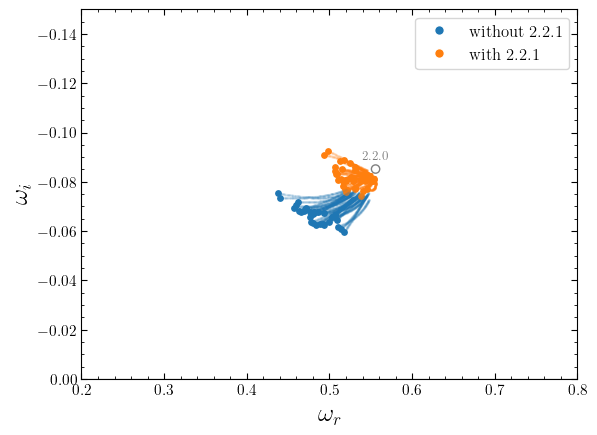

In [298]:
fig, ax = plt.subplots()
ax.set_xlim(0.2,0.8)
ax.set_ylim(0,-0.15)
plot_predicted_qnms(
        ax,
        long_str_to_qnms("2.2.0", Mf, af),
        cut_at_0 = True)
for toy_fitter in toy_fitters_EOB_free_0:
    plot_omega_free(
        toy_fitter.result_full,
        ax=ax, t0_max=10,
        indicate_start=True, color = "C0",
        line_alpha = 0.1, scatter_alpha = 0.1)
for toy_fitter in toy_fitters_EOB_free_1:
    plot_omega_free(
        toy_fitter.result_full,
        ax=ax, t0_max=10,
        indicate_start=True, color = "C1",
        line_alpha = 0.1, scatter_alpha = 0.1)
# ax.add_patch(Rectangle((qnm221r/2, qnm221i/2), qnm221r, qnm221i, ec = 'gray', fc = 'none', ls = ":"))
ax.legend(handles = legend_elements)
plt.savefig("./plots/EOB_toy_220_free.pdf", bbox_inches = "tight")

In [40]:
t0_arr = np.linspace(0,10,num = 101)
qnm_free_list = long_str_to_qnms_free("2.2.0")
toy_fitters_no_exp_varMa_0 = []
for i, h in enumerate(h_no_exp_list):
    fitter = QNMFitVaryingStartingTime(h,
                t0_arr,
                qnm_fixed_list = [],
                qnm_free_list=qnm_free_list,
                var_M_a = True,
                run_string_prefix=f"noexp{i}",
                load_pickle = False)
    toy_fitters_no_exp_varMa_0.append(fitter)

In [41]:
qnm_free_list = long_str_to_qnms_free("2.2.0_2.2.1")
toy_fitters_no_exp_varMa_1 = []
for i, h in enumerate(h_no_exp_list):
    fitter = QNMFitVaryingStartingTime(h,
                t0_arr,
                qnm_fixed_list = [],
                qnm_free_list=qnm_free_list,
                var_M_a = True,
                run_string_prefix=f"noexp{i}",
                load_pickle = False)
    toy_fitters_no_exp_varMa_1.append(fitter)

In [42]:
for toy_fitter in toy_fitters_no_exp_varMa_0:
    toy_fitter.do_fits()

101it [00:19,  5.30it/s]
101it [00:12,  7.79it/s]
101it [00:12,  7.91it/s]
101it [00:12,  8.02it/s]
101it [00:12,  7.88it/s]
101it [00:11,  8.46it/s]
101it [00:12,  7.83it/s]
101it [00:12,  8.42it/s]
101it [00:10,  9.48it/s]
101it [00:13,  7.39it/s]
101it [00:11,  8.57it/s]
101it [00:12,  8.32it/s]
101it [00:12,  8.31it/s]
101it [00:13,  7.57it/s]
101it [00:13,  7.36it/s]
101it [00:10,  9.21it/s]
101it [00:11,  8.67it/s]
101it [00:12,  8.38it/s]
101it [00:12,  8.08it/s]
101it [00:10,  9.21it/s]
101it [00:11,  8.85it/s]
101it [00:11,  8.50it/s]
101it [00:13,  7.71it/s]
101it [00:10,  9.21it/s]
101it [00:11,  8.81it/s]
101it [00:11,  8.52it/s]
101it [00:11,  8.53it/s]
101it [00:10,  9.78it/s]
101it [00:11,  8.91it/s]
101it [00:11,  9.09it/s]


In [43]:
for toy_fitter in toy_fitters_no_exp_varMa_1:
    toy_fitter.do_fits()

101it [00:32,  3.14it/s]
101it [00:22,  4.49it/s]
101it [00:27,  3.70it/s]
101it [00:19,  5.23it/s]
101it [00:21,  4.69it/s]
101it [00:25,  4.03it/s]
101it [00:27,  3.69it/s]
101it [00:23,  4.25it/s]
101it [00:17,  5.94it/s]
101it [00:25,  3.94it/s]
101it [00:21,  4.80it/s]
101it [00:21,  4.71it/s]
101it [00:25,  3.96it/s]
101it [00:24,  4.08it/s]
101it [00:24,  4.16it/s]
101it [00:22,  4.57it/s]
101it [00:24,  4.06it/s]
101it [00:24,  4.17it/s]
101it [00:24,  4.11it/s]
101it [00:19,  5.14it/s]
101it [00:21,  4.71it/s]
101it [00:34,  2.97it/s]
101it [00:23,  4.30it/s]
101it [00:20,  4.95it/s]
101it [00:21,  4.80it/s]
101it [00:19,  5.22it/s]
101it [00:20,  4.85it/s]
101it [00:18,  5.51it/s]
101it [00:23,  4.30it/s]
101it [00:31,  3.20it/s]


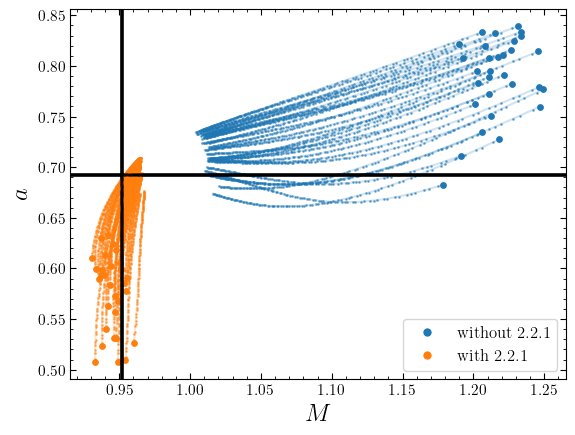

In [44]:
fig, ax = plt.subplots()
for toy_fitter in toy_fitters_no_exp_varMa_0:
    plot_M_a(toy_fitter.result_full, Mf = Mf, af = af, ax = ax, color = "C0", indicate_start = True)
for toy_fitter in toy_fitters_no_exp_varMa_1:
    plot_M_a(toy_fitter.result_full, Mf = Mf, af = af, ax = ax, color = "C1", indicate_start = True)
ax.legend(handles = legend_elements)
plt.savefig("./plots/no_exp_M_a.pdf", bbox_inches = "tight", dpi = 150)

In [45]:
t0_arr = np.linspace(0,10,num = 101)
toy_fitters_no_exp_free_1 = []
for i, h in enumerate(h_no_exp_list):
    fitter_overtone = QNMFitVaryingStartingTime(h,
                t0_arr,
                1,
                qnm_fixed_list = long_str_to_qnms("2.2.1", Mf, af),
                run_string_prefix=f"noexp{i}",
                load_pickle = False)
    toy_fitters_no_exp_free_1.append(fitter_overtone)

In [46]:
toy_fitters_no_exp_free_0 = []
for i, h in enumerate(h_no_exp_list):
    fitter_overtone = QNMFitVaryingStartingTime(h,
                t0_arr,
                1,
                qnm_fixed_list = [],
                run_string_prefix=f"noexp{i}",
                load_pickle = False)
    toy_fitters_no_exp_free_0.append(fitter_overtone)

In [47]:
for toy_fitter in toy_fitters_no_exp_free_1:
    toy_fitter.do_fits()

101it [00:01, 54.22it/s]
101it [00:01, 69.39it/s]
101it [00:01, 65.08it/s] 
101it [00:01, 71.21it/s]
101it [00:01, 68.78it/s]
101it [00:01, 73.18it/s]
101it [00:01, 69.19it/s]
101it [00:01, 70.73it/s]
101it [00:01, 82.17it/s]
101it [00:01, 62.22it/s]
101it [00:01, 63.95it/s]
101it [00:01, 62.49it/s]
101it [00:01, 66.88it/s]
101it [00:01, 60.36it/s]
101it [00:01, 61.57it/s]
101it [00:01, 66.04it/s]
101it [00:01, 64.29it/s]
101it [00:01, 69.79it/s]
101it [00:01, 56.01it/s]
101it [00:02, 43.10it/s]
101it [00:01, 65.03it/s]
101it [00:01, 66.25it/s]
101it [00:01, 65.71it/s]
101it [00:01, 66.26it/s]
101it [00:01, 69.48it/s] 
101it [00:01, 73.41it/s]
101it [00:01, 75.61it/s]
101it [00:01, 85.01it/s]
101it [00:01, 68.99it/s]
101it [00:01, 79.34it/s]


In [48]:
for toy_fitter in toy_fitters_no_exp_free_0:
    toy_fitter.do_fits()

101it [00:01, 81.70it/s] 
101it [00:01, 89.44it/s]
101it [00:01, 83.19it/s]
101it [00:01, 88.41it/s]
101it [00:01, 87.66it/s] 
101it [00:01, 90.23it/s] 
101it [00:01, 82.22it/s]
101it [00:01, 87.69it/s]
101it [00:01, 89.87it/s]
101it [00:01, 83.55it/s]
101it [00:01, 86.41it/s]
101it [00:01, 90.78it/s]
101it [00:01, 83.68it/s]
101it [00:01, 86.93it/s]
101it [00:01, 81.56it/s]
101it [00:01, 91.57it/s]
101it [00:01, 91.13it/s]
101it [00:01, 83.85it/s]
101it [00:01, 83.65it/s]
101it [00:01, 91.00it/s] 
101it [00:01, 85.29it/s]
101it [00:01, 89.29it/s] 
101it [00:01, 81.26it/s]
101it [00:01, 94.34it/s]
101it [00:01, 90.80it/s]
101it [00:01, 85.17it/s]
101it [00:01, 89.21it/s]
101it [00:01, 94.37it/s]
101it [00:01, 89.96it/s] 
101it [00:01, 96.83it/s]


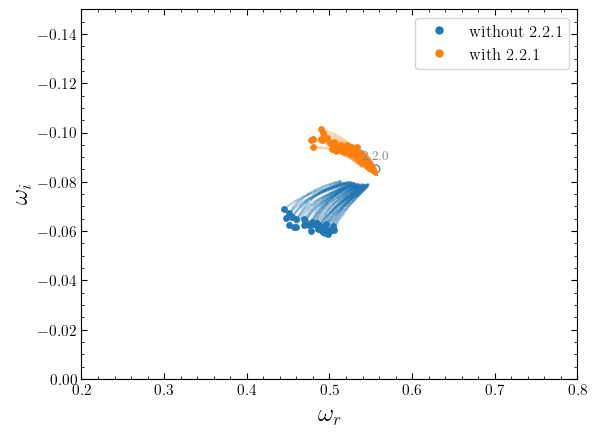

In [49]:
fig, ax = plt.subplots()
ax.set_xlim(0.2,0.8)
ax.set_ylim(0,-0.15)
plot_predicted_qnms(
        ax,
        long_str_to_qnms("2.2.0", Mf, af),
        cut_at_0 = True)
for toy_fitter in toy_fitters_no_exp_free_0:
    plot_omega_free(
        toy_fitter.result_full,
        ax=ax, t0_max=10,
        indicate_start=True, color = "C0",
        line_alpha = 0.1, scatter_alpha = 0.1)
for toy_fitter in toy_fitters_no_exp_free_1:
    plot_omega_free(
        toy_fitter.result_full,
        ax=ax, t0_max=10,
        indicate_start=True, color = "C1",
        line_alpha = 0.1, scatter_alpha = 0.1)
ax.legend(handles = legend_elements)
# ax.add_patch(Rectangle((qnm221r/2, qnm221i/2), qnm221r, qnm221i, ec = 'gray', fc = 'none', ls = ":"))
plt.savefig("./plots/no_exp_toy_220_free.pdf", bbox_inches = "tight")

# Collective Filter test

In [5]:
def get_waveform_from_data(filename):
    with open(filename) as f:
        times = []
        hr = []
        hi = []
        for line in f:
            times.append(float(line.split()[0]))
            hr.append(float(line.split()[1]))
            hi.append(float(line.split()[2]))
        times = np.array(times)
        hr = np.array(hr)
        hi = np.array(hi)
        
    h = waveform(times, hr + 1.j*hi, l=2, m=2)
    
    return h

In [66]:
h_original_load = get_waveform_from_data("./data/original.dat")
h_filtered_load = get_waveform_from_data("./data/filter.dat")
h_filtered_load.update_peaktime(h_original_load.peaktime)
t_shift = h_filtered_load.peaktime - h_original_load.peaktime

In [59]:
t0_arr = np.linspace(-50, 50, num = 1001)

In [88]:
fitter_original = QNMFitVaryingStartingTime(h_original_load,
                t0_arr,
                0,
                qnm_fixed_list = long_str_to_qnms("2.2.0_2.2.1", Mf, af),
                run_string_prefix=f"h_original",
                load_pickle = True)
fitter_filter = QNMFitVaryingStartingTime(h_filtered_load,
                t0_arr-t_shift,
                0,
                qnm_fixed_list = long_str_to_qnms("2.2.1", 1, af),
                run_string_prefix=f"h_filter",
                load_pickle = True)
fitter_filter_2 = QNMFitVaryingStartingTime(h_filtered_load,
                t0_arr-t_shift,
                0,
                qnm_fixed_list = long_str_to_qnms("2.2.0_2.2.1", 1, af),
                run_string_prefix=f"h_filter_2",
                load_pickle = True)

In [90]:
fitter_original.do_fits()
fitter_filter.do_fits()
fitter_filter_2.do_fits()

0it [00:00, ?it/s]

reloaded fit h_original_N_0_fix_2.2.0_2.2.1_t0_-50.0000_50.0000_1001 from an old run.
reloaded fit h_filter_N_0_fix_2.2.1_t0_-43.0007_56.9993_1001 from an old run.


1001it [00:08, 120.65it/s]


In [91]:
q221_M_1 = long_str_to_qnms("2.2.1", 1, af)[0]

In [93]:
A_fix_list_original = list(fitter_original.result_full.A_fix_dict.values())
A_fix_list_filter = list(fitter_filter.result_full.A_fix_dict.values())
A_fix_list_filter_2 = list(fitter_filter_2.result_full.A_fix_dict.values())

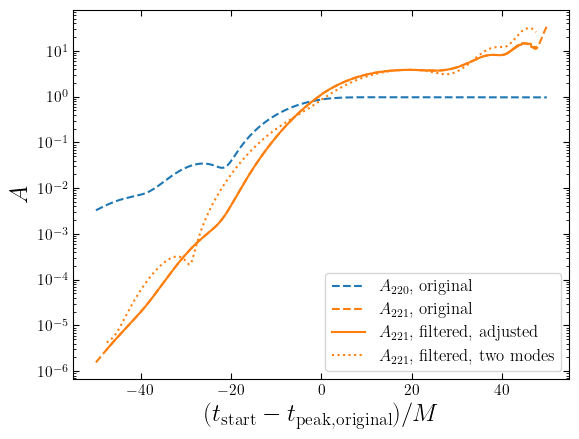

In [96]:
fig, ax = plt.subplots()
label = [r"$A_{220}$, original", r"$A_{221}$, original"]
for i, A_arr in enumerate(A_fix_list_original):
    ax.semilogy(t0_arr, np.abs(A_arr), ls = "--", label = label[i])
for A_arr in A_fix_list_filter:
    # ax.semilogy(t0_arr*Mf, np.abs(A_arr)*np.exp(-q221_M_1.omegai*t_shift)/0.503878, c = "C1", label = r"$A_{221}$, filtered, adjusted")
    ax.semilogy(t0_arr*Mf, np.abs(A_arr)*np.exp(-q221_M_1.omegai*t_shift)/0.503878, 
                c = "C1", label = r"$A_{221}$, filtered, adjusted")
for A_arr in A_fix_list_filter_2[1:]:
    # ax.semilogy(t0_arr*Mf, np.abs(A_arr)*np.exp(-q221_M_1.omegai*t_shift)/0.503878, c = "C1", label = r"$A_{221}$, filtered, adjusted")
    ax.semilogy(t0_arr*Mf, np.abs(A_arr)*np.exp(-q221_M_1.omegai*t_shift)/0.503878, ls = ":",
                c = "C1", label = r"$A_{221}$, filtered, two modes")
ax.legend()
ax.set_xlabel(r"$(t_{\rm start} - t_{\rm peak, original}) / M$")
ax.set_ylabel(r"$A$")
plt.savefig("./plots/A_2.2.1_original_vs_filtered_2.pdf", bbox_inches = "tight", dpi = 150)

In [320]:
reload(QuasinormalMode)
from QuasinormalMode import *
reload(Waveforms)
from Waveforms import *
reload(Fit)
from Fit import *
reload(utils)
from utils import *
reload(plot)
from plot import *
reload(ModeSelection)
from ModeSelection import *
reload(postprocess)
from postprocess import *
reload(GRChombo_load)
from GRChombo_load import *